<a href="https://colab.research.google.com/github/antony171060/Miraflores---A.-No-Supervisado/blob/master/Miraflores_A_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
!gdown --id 1LfUep5nl2qAn1pquylVb-cKxJ9lRijpk

Downloading...
From: https://drive.google.com/uc?id=1LfUep5nl2qAn1pquylVb-cKxJ9lRijpk
To: /content/Monitoreo_julio.xlsx
100% 86.0k/86.0k [00:00<00:00, 64.8MB/s]


In [154]:
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
data = pd.read_excel("Monitoreo_julio.xlsx")
data.head(3)

,ID,CODIGO DE LA ENTIDAD,CODIGO UBIGEO INEI,CODIGO PAIS,NOMBRE DE LA UO,Fecha,CO (ug/m3),H2S (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 \n(ug/m3),PM2.5 \n(ug/m3),SO2 (ug/m3),Ruido (dB),UV,Humedad (%),Latitud,Longitud,Presion \n(Pa),Temperatura (C)
0,1,10069,150122,PE,Subgerencia de Desarrollo Ambiental,2020-07-01 00:00:00,0.0,0.0,85.205,0.0,40.796,18.586,7.274,72.477,0.0,91.640,-12.109723,-77.05194,100750.768,15.711
1,2,10069,150122,PE,Subgerencia de Desarrollo Ambiental,2020-07-01 01:00:00,0.0,0.0,84.505,0.0,48.194,21.018,7.276,69.671,0.0,91.324,-12.109723,-77.05194,100739.407,15.725
2,3,10069,150122,PE,Subgerencia de Desarrollo Ambiental,2020-07-01 02:00:00,0.0,0.0,83.381,0.0,40.881,18.833,7.253,72.052,0.0,92.585,-12.109723,-77.05194,100743.128,15.441


In [156]:
data = data.drop(['ID',
                  'CODIGO DE LA ENTIDAD',
                  'CODIGO UBIGEO INEI',
                  'CODIGO PAIS ',
                  'NOMBRE DE LA UO',
                  'Latitud',
                  'Longitud'],axis=1)
data.head(3)

,Fecha,CO (ug/m3),H2S (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 \n(ug/m3),PM2.5 \n(ug/m3),SO2 (ug/m3),Ruido (dB),UV,Humedad (%),Presion \n(Pa),Temperatura (C)
0,2020-07-01 00:00:00,0.0,0.0,85.205,0.0,40.796,18.586,7.274,72.477,0.0,91.640,100750.768,15.711
1,2020-07-01 01:00:00,0.0,0.0,84.505,0.0,48.194,21.018,7.276,69.671,0.0,91.324,100739.407,15.725
2,2020-07-01 02:00:00,0.0,0.0,83.381,0.0,40.881,18.833,7.253,72.052,0.0,92.585,100743.128,15.441


In [157]:
data['Año'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data['Dia'] = data['Fecha'].dt.day
data['Hora'] = data['Fecha'].dt.hour
data.head(3)

,Fecha,CO (ug/m3),H2S (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 \n(ug/m3),PM2.5 \n(ug/m3),SO2 (ug/m3),Ruido (dB),UV,Humedad (%),Presion \n(Pa),Temperatura (C),Año,Mes,Dia,Hora
0,2020-07-01 00:00:00,0.0,0.0,85.205,0.0,40.796,18.586,7.274,72.477,0.0,91.640,100750.768,15.711,2020,7,1,0
1,2020-07-01 01:00:00,0.0,0.0,84.505,0.0,48.194,21.018,7.276,69.671,0.0,91.324,100739.407,15.725,2020,7,1,1
2,2020-07-01 02:00:00,0.0,0.0,83.381,0.0,40.881,18.833,7.253,72.052,0.0,92.585,100743.128,15.441,2020,7,1,2


In [158]:
data = data.drop(['Fecha', 'Año', 'Mes'],axis=1)
data.head(3)

,CO (ug/m3),H2S (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 \n(ug/m3),PM2.5 \n(ug/m3),SO2 (ug/m3),Ruido (dB),UV,Humedad (%),Presion \n(Pa),Temperatura (C),Dia,Hora
0,0.0,0.0,85.205,0.0,40.796,18.586,7.274,72.477,0.0,91.640,100750.768,15.711,1,0
1,0.0,0.0,84.505,0.0,48.194,21.018,7.276,69.671,0.0,91.324,100739.407,15.725,1,1
2,0.0,0.0,83.381,0.0,40.881,18.833,7.253,72.052,0.0,92.585,100743.128,15.441,1,2


In [159]:
data.shape

(744, 14)

In [160]:
data.isnull().sum()

CO (ug/m3)         0
H2S (ug/m3)        0
NO2 (ug/m3)        0
O3 (ug/m3)         0
PM10 \n(ug/m3)     0
PM2.5 \n(ug/m3)    0
SO2 (ug/m3)        0
Ruido (dB)         0
UV                 0
Humedad (%)        0
Presion \n(Pa)     0
Temperatura (C)    0
Dia                0
Hora               0
dtype: int64

In [161]:
data.dtypes

CO (ug/m3)         float64
H2S (ug/m3)        float64
NO2 (ug/m3)        float64
O3 (ug/m3)         float64
PM10 \n(ug/m3)     float64
PM2.5 \n(ug/m3)    float64
SO2 (ug/m3)        float64
Ruido (dB)         float64
UV                 float64
Humedad (%)        float64
Presion \n(Pa)     float64
Temperatura (C)    float64
Dia                  int64
Hora                 int64
dtype: object

In [162]:
"""
indices = [200, 500, 700]
muestras = pd.DataFrame(data.loc[indices],
                        columns = data.keys()).reset_index(drop = True)
data = data.drop(indices, axis=0)
muestras
"""

'\nindices = [200, 500, 700]\nmuestras = pd.DataFrame(data.loc[indices],\n                        columns = data.keys()).reset_index(drop = True)\ndata = data.drop(indices, axis=0)\nmuestras\n'

In [163]:
from sklearn import preprocessing
data_escalada = preprocessing.Normalizer(norm="l2").fit_transform(data)
data_escalada

array([[0.00000000e+00, 0.00000000e+00, 8.45699782e-04, ...,
        1.55939080e-04, 9.92547130e-06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.38846536e-04, ...,
        1.56095637e-04, 9.92659056e-06, 9.92659056e-06],
       [0.00000000e+00, 0.00000000e+00, 8.27658492e-04, ...,
        1.53270826e-04, 9.92622410e-06, 1.98524482e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.06294919e-03, ...,
        1.49300370e-04, 3.07529001e-04, 2.08326098e-04],
       [0.00000000e+00, 0.00000000e+00, 1.02836127e-03, ...,
        1.48746369e-04, 3.07450156e-04, 2.18190433e-04],
       [0.00000000e+00, 0.00000000e+00, 9.46719048e-04, ...,
        1.48299580e-04, 3.07469701e-04, 2.28122682e-04]])

In [164]:
from sklearn.cluster import KMeans

X = data_escalada.copy()

inercia=[]

for i in range(1, 20):
  algoritmo=KMeans(n_clusters =i, init='k-means++',
                   max_iter=300, n_init=10)
  algoritmo.fit(X)
  inercia.append(algoritmo.inertia_)

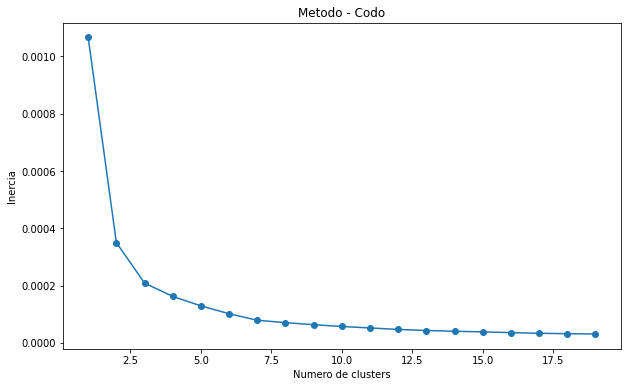

In [165]:
plt.figure(figsize=[10,6])
plt.title("Metodo - Codo")
plt.xlabel("Numero de clusters")
plt.ylabel("Inercia")
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

In [166]:
algoritmo = KMeans(n_clusters=7)
algoritmo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [167]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [168]:
etiquetas

array([0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 6, 6, 6, 6, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 5, 5, 5, 0, 6, 6, 6, 6, 6, 6, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6,
       6, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6,
       6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 5, 0, 5,
       6, 6, 6, 6, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 5,
       0, 0, 6, 6, 6, 6, 6, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 6, 6, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 6, 6, 6, 6, 6, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,

In [169]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
data_prediccion = algoritmo.predict(data_escalada)
for i, pred in enumerate(data_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 0
Muestra 2 se encuentra en el clúster: 0
Muestra 3 se encuentra en el clúster: 0
Muestra 4 se encuentra en el clúster: 0
Muestra 5 se encuentra en el clúster: 0
Muestra 6 se encuentra en el clúster: 0
Muestra 7 se encuentra en el clúster: 0
Muestra 8 se encuentra en el clúster: 5
Muestra 9 se encuentra en el clúster: 0
Muestra 10 se encuentra en el clúster: 0
Muestra 11 se encuentra en el clúster: 5
Muestra 12 se encuentra en el clúster: 6
Muestra 13 se encuentra en el clúster: 6
Muestra 14 se encuentra en el clúster: 6
Muestra 15 se encuentra en el clúster: 6
Muestra 16 se encuentra en el clúster: 0
Muestra 17 se encuentra en el clúster: 0
Muestra 18 se encuentra en el clúster: 0
Muestra 19 se encuentra en el clúster: 2
Muestra 20 se encuentra en el clúster: 2
Muestra 21 se encuentra en el clúster: 2
Muestra 22 se encuentra en el clúster: 2
Muestra 23 se encuentra en el clúster: 2
Muestra 24 se encuentra en